In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#using a relative path
file_path = "../data/AmesHousing.csv"
df = pd.read_csv(file_path)

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Feature Engineering Importance Section with Visualization

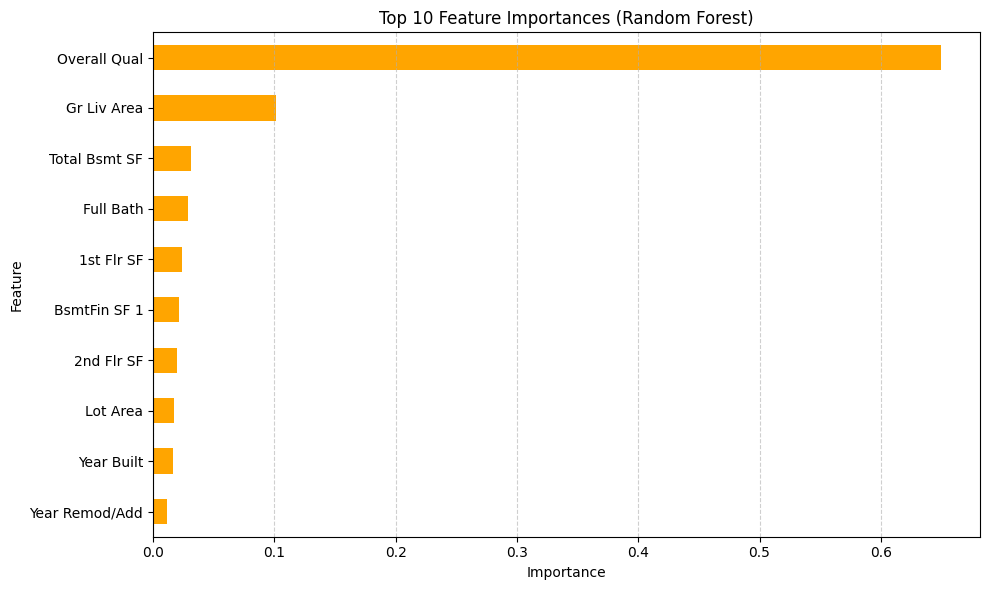

In [3]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

df_numeric = df.select_dtypes(include=[np.number]).dropna()

X = df_numeric.drop('SalePrice', axis=1)
y = df_numeric['SalePrice']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Using a linear regression model on Sales Price, we chose the variables Overall Quality, Gr liv area, and new variablegarage cars to predict Sale Price. Also using a 20% test group and 80% train group.

In [4]:
X = df[['Overall Qual', 'Gr Liv Area', 'Garage Cars']].fillna(0)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", round(r2_score(y_test, y_pred), 3))
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print("Intercept:", round(model.intercept_, 2))


R²: 0.76
Coefficients: {'Overall Qual': np.float64(27600.794042200378), 'Gr Liv Area': np.float64(50.23646269367018), 'Garage Cars': np.float64(20017.12258659879)}
Intercept: -98749.69


#### This first regression shows a strong linear relationship: home sale price increases by about $27.6 k per quality point, $50 per square foot, and $20 k per garage space, explaining roughly 76% of price variation.

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

/var/folders/5_/wt4fcyfx61761q_hmp3yxtjm0000gn/T/ipykernel_4013/828468602.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


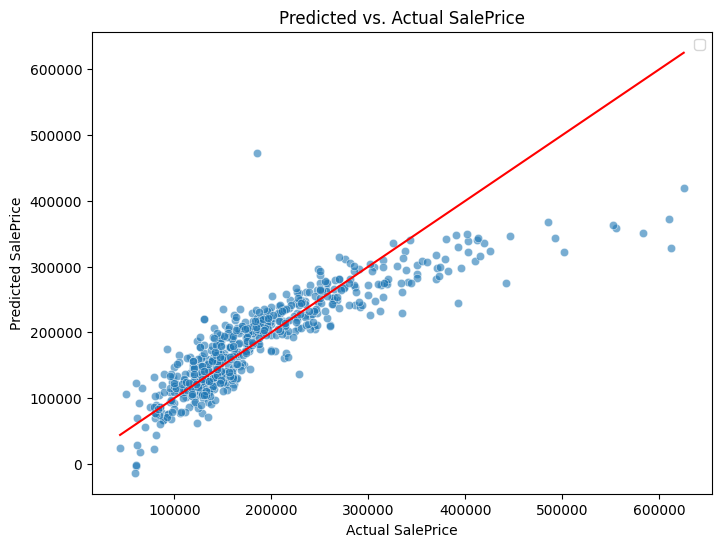

In [6]:
# Visualization of Regression

## Predicted vs. Actual Sales Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs. Actual SalePrice')
plt.legend()
plt.show()

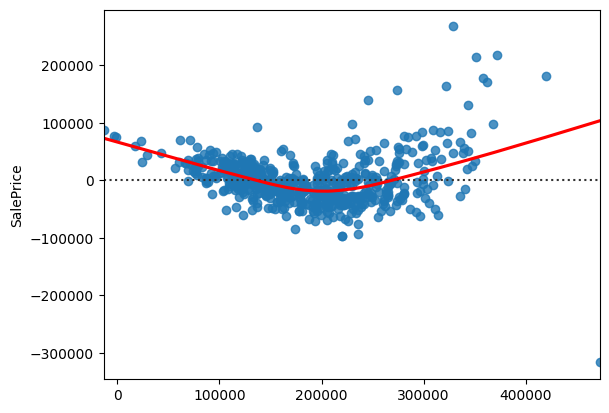

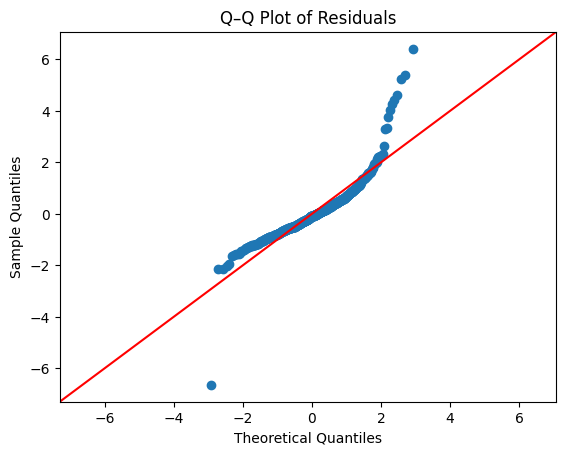

In [7]:
## Residual Plot
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.show()

## Q-Q Plot 

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

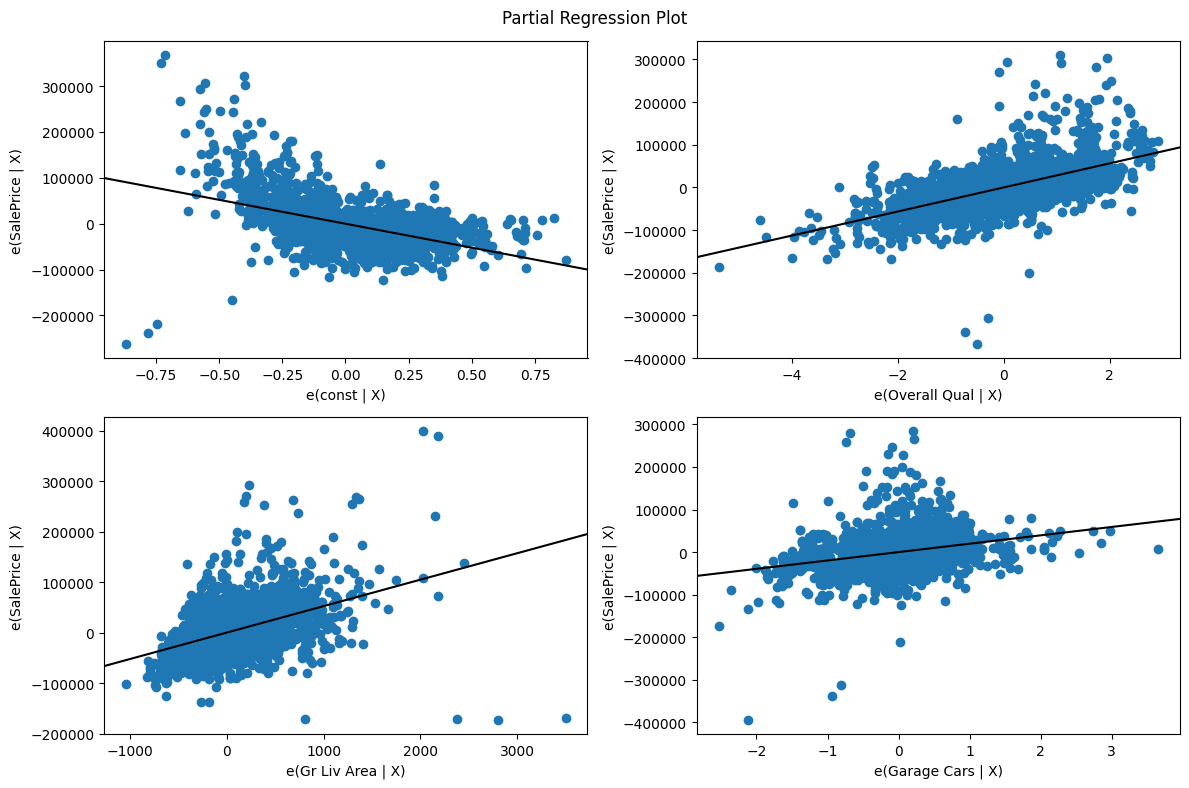

In [9]:
X_const = sm.add_constant(df[['Overall Qual', 'Gr Liv Area', 'Garage Cars']].fillna(0))
model_sales = sm.OLS(df['SalePrice'], X_const).fit()

# Partial Regression Plot
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_sales, fig=fig)
plt.tight_layout()
plt.show()

#### For the predicted vs. actual sales price plot, we see that most of the datapoints are clustered around the red line, but after 300k we see a fall off from the line suggesting some room for improvement. The Q-Q plot shows that most of the points lie along the line until a deviation at the end tail which suggests non-normality. The residuals vs. predicted sales price suggests nonlinearity and hetereoscedasticity. The partial regression plots reflect the idea that as each variable increases, the sales price also increases. For model improvements, some steps would be handling outliers, outcome variable transformations, etc. Next, feature selection will be completed to find the best regression model to predict price using specific variables in the dataset. 